# Data Processing

In [1]:
# # upload data from Google Drive

# from google.colab import drive
# import os

# # prompt for authorization
# drive.mount('/content/drive')

# folder_path = '/content/drive/My Drive/'

# if os.path.exists(folder_path):
#     # change current working directory
#     os.chdir(folder_path)
#     print("Changed working directory to:", os.getcwd())
# else:
#     print("Folder not found:", folder_path)

In [2]:
# necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read in .csv file
data = pd.read_csv("ryanair_reviews.csv")

data.head()

,Record ID,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,...,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
0,0,2024-02-03,10.0,United Kingdom,Not Verified,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Boeing 737 900,Family Leisure,Economy Class,...,Luton,February 2024,4.0,5.0,3.0,4.0,4.0,yes,NaN,NaN
1,1,2024-01-26,10.0,United Kingdom,Trip Verified,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,NaN,Couple Leisure,Economy Class,...,Alicante,January 2024,3.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
2,2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,...,Paris Beauvais,October 2023,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
3,3,2024-01-07,6.0,United Kingdom,Trip Verified,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Boeing 737,Solo Leisure,Economy Class,...,Liverpool,January 2024,3.0,2.0,1.0,3.0,3.0,yes,NaN,NaN
4,4,2024-01-06,10.0,Israel,Trip Verified,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Boeing 737-800,Solo Leisure,Economy Class,...,Manchester,January 2024,4.0,5.0,NaN,4.0,5.0,yes,NaN,NaN


In [4]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249 entries, 0 to 2248
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record ID               2249 non-null   int64  
 1   Date Published          2249 non-null   object 
 2   Overall Rating          2119 non-null   float64
 3   Passenger Country       2249 non-null   object 
 4   Trip_verified           1305 non-null   object 
 5   Comment title           2249 non-null   object 
 6   Comment                 2249 non-null   object 
 7   Aircraft                551 non-null    object 
 8   Type Of Traveller       1635 non-null   object 
 9   Seat Type               2249 non-null   object 
 10  Origin                  1634 non-null   object 
 11  Destination             1634 non-null   object 
 12  Date Flown              1631 non-null   object 
 13  Seat Comfort            2137 non-null   float64
 14  Cabin Staff Service     2128 non-null   

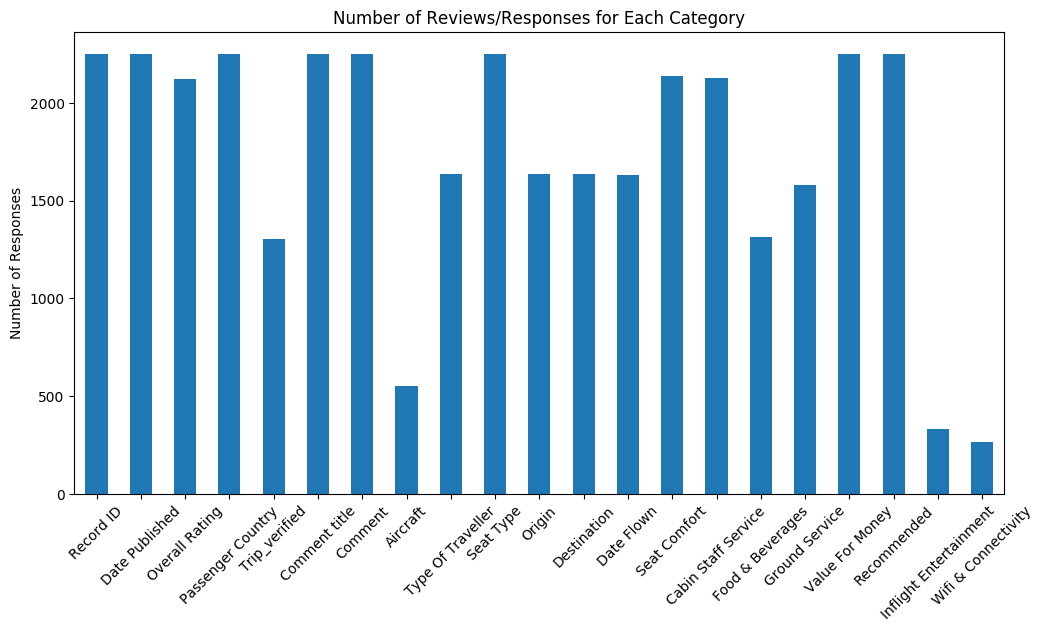

In [5]:
# number of responses for each category
responses = data.count()

# Plotting the bar chart for the response counts
plt.figure(figsize=(12, 6))
responses.plot(kind='bar')
plt.title('Number of Reviews/Responses for Each Category')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.show()

# Data Cleaning

In [6]:
# drop the 'Unnamed: 0' column - index use only
data_cleaned = data.drop(columns=['Record ID'])

# convert 'Date Published' and 'Date Flown' to datetime objects
data_cleaned['Date Published'] = pd.to_datetime(data_cleaned['Date Published'])
data_cleaned['Date Flown'] = pd.to_datetime(data_cleaned['Date Flown'], errors='coerce')  # Coerce errors due to invalid parsing

data_cleaned.head()

,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
0,2024-02-03,10.0,United Kingdom,Not Verified,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Boeing 737 900,Family Leisure,Economy Class,Faro,Luton,2024-02-01,4.0,5.0,3.0,4.0,4.0,yes,NaN,NaN
1,2024-01-26,10.0,United Kingdom,Trip Verified,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,NaN,Couple Leisure,Economy Class,Belfast,Alicante,2024-01-01,3.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,Edinburgh,Paris Beauvais,2023-10-01,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
3,2024-01-07,6.0,United Kingdom,Trip Verified,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Boeing 737,Solo Leisure,Economy Class,Faro,Liverpool,2024-01-01,3.0,2.0,1.0,3.0,3.0,yes,NaN,NaN
4,2024-01-06,10.0,Israel,Trip Verified,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Boeing 737-800,Solo Leisure,Economy Class,Dublin,Manchester,2024-01-01,4.0,5.0,NaN,4.0,5.0,yes,NaN,NaN


# Impute Values

In [7]:
# option to impute missing values
# fills numerical columns with median values
# fills categorical columns with the mode

'''

numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

for col in numerical_columns:
    data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

for col in categorical_columns:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

'''

"\n\nnumerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns\ncategorical_columns = data_cleaned.select_dtypes(include=['object']).columns\n\nfor col in numerical_columns:\n    data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)\n\nfor col in categorical_columns:\n    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)\n\n"

In [8]:
# !pip install --upgrade seaborn

# EDA

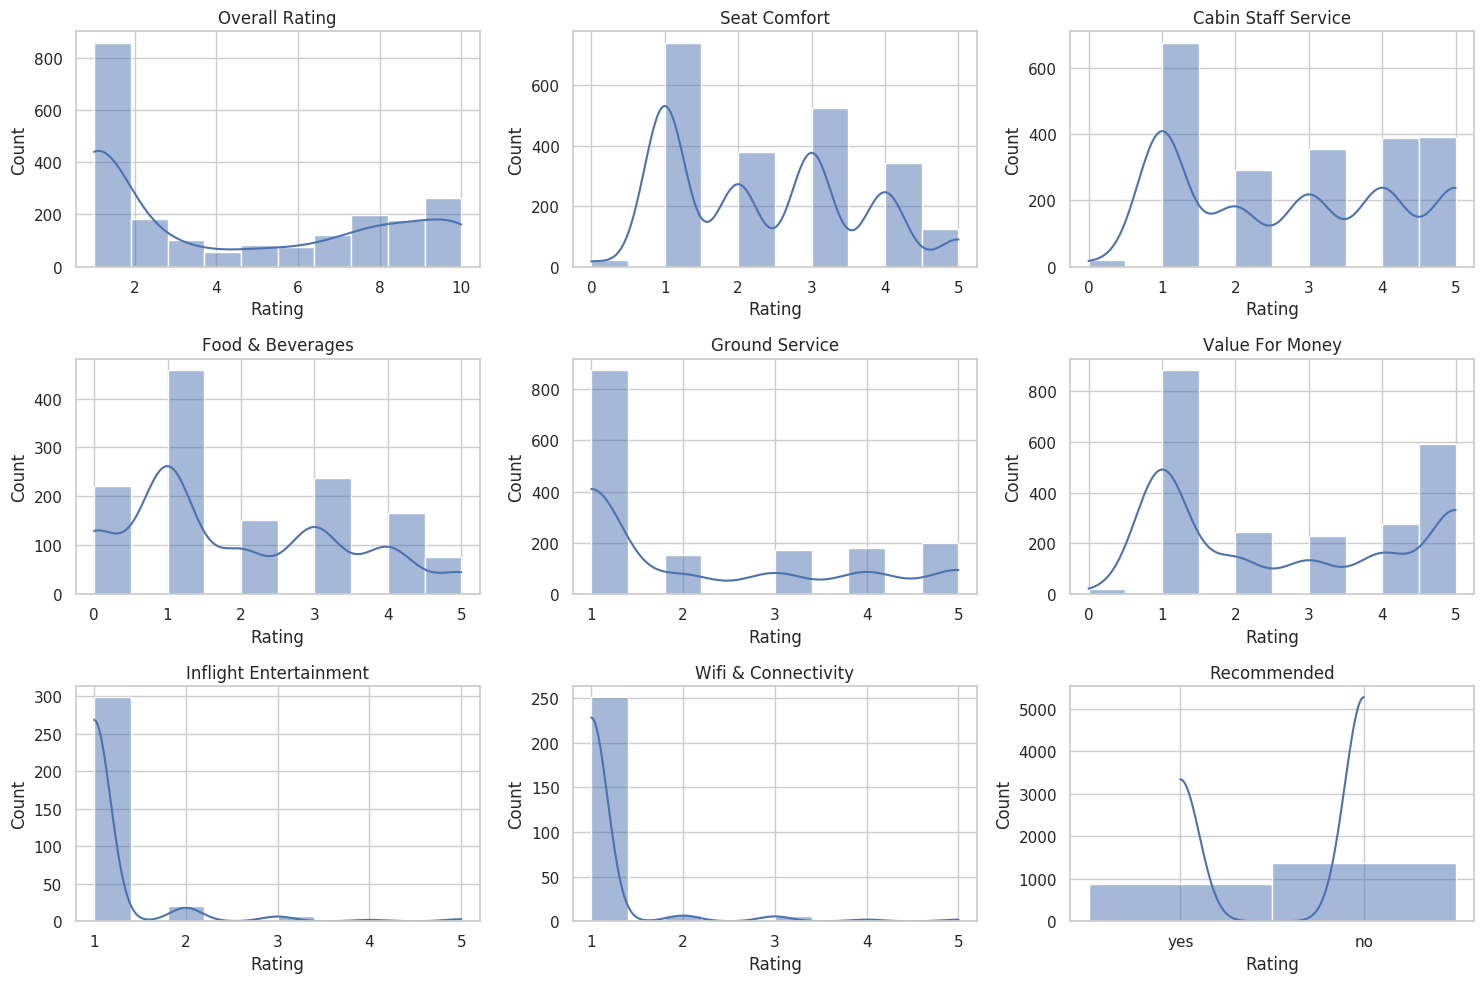

In [9]:
# sns style for plots
sns.set(style="whitegrid")

# numerical rating columns for univariate analysis
rating_cols = ['Overall Rating', 'Seat Comfort', 'Cabin Staff Service',
               'Food & Beverages', 'Ground Service', 'Value For Money',
               'Inflight Entertainment', 'Wifi & Connectivity', 'Recommended']

# distributions of numerical rating columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(rating_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data_cleaned[col], kde=True, bins=10)
    plt.title(col)
    plt.xlabel('Rating')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

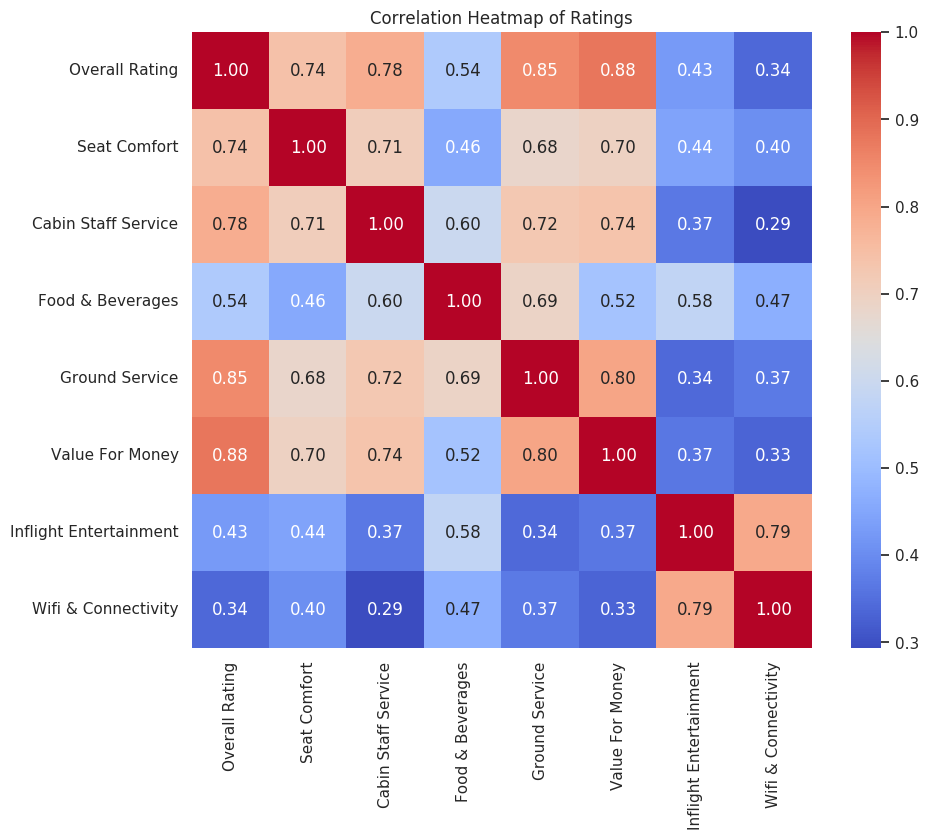

In [10]:
# correlation heatmap of numerical ratings
correlation_matrix = data_cleaned[rating_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Ratings")
plt.show()

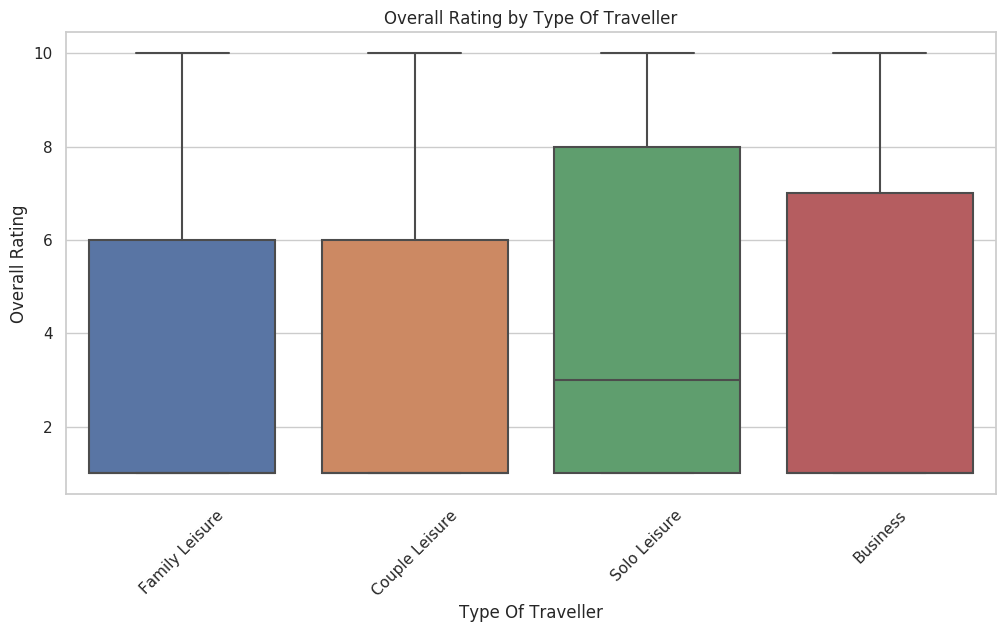

In [11]:
# overall ratings across different Type of Traveller categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type Of Traveller', y='Overall Rating', data=data_cleaned)
plt.xticks(rotation=45)
plt.title('Overall Rating by Type Of Traveller')
plt.show()

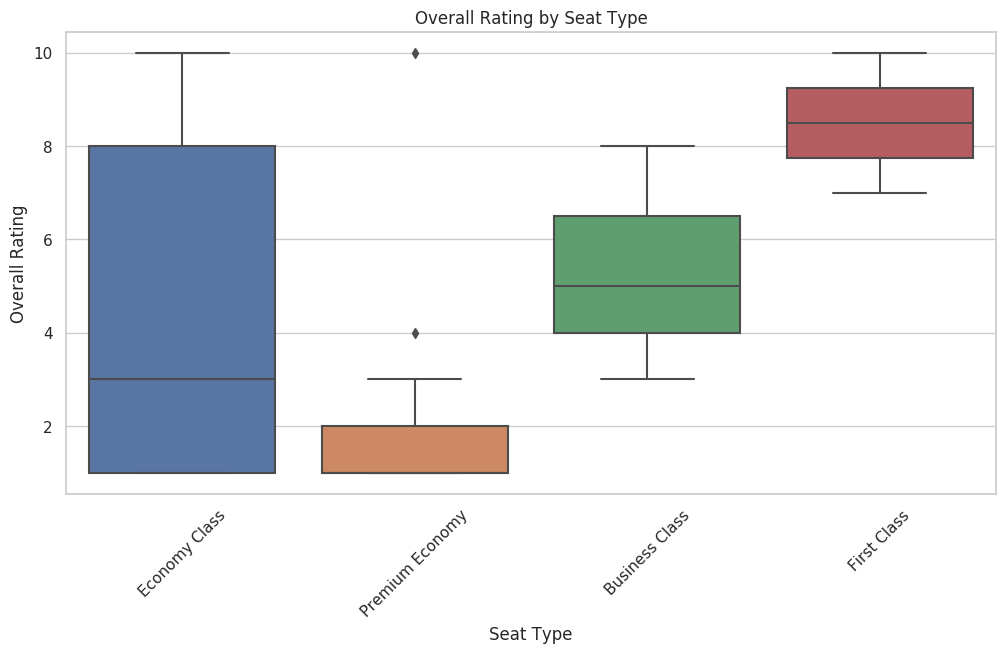

In [12]:
# overall ratings by different Seat Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Seat Type', y='Overall Rating', data=data_cleaned)
plt.xticks(rotation=45)
plt.title('Overall Rating by Seat Type')
plt.show()

In [13]:
# !pip install wordcloud

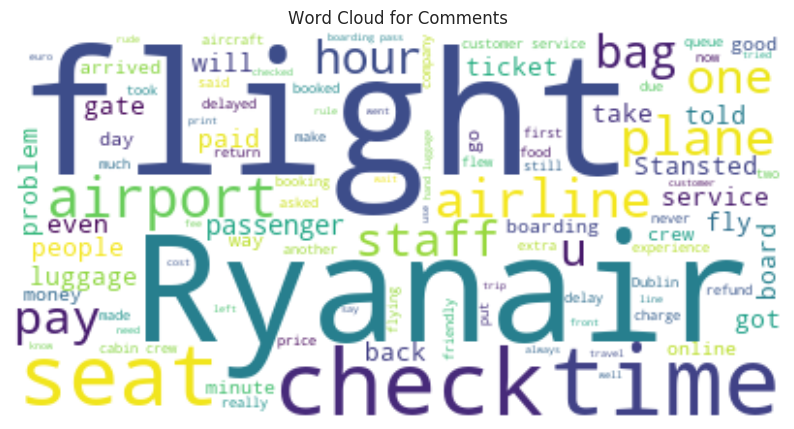

In [14]:
from wordcloud import WordCloud

# word cloud for the 'Comment' column
text = " ".join(review for review in data_cleaned.Comment)

# word cloud image
wordcloud = WordCloud(background_color="white", max_words=100).generate(text)

# display wordcloud image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Comments")
plt.show()


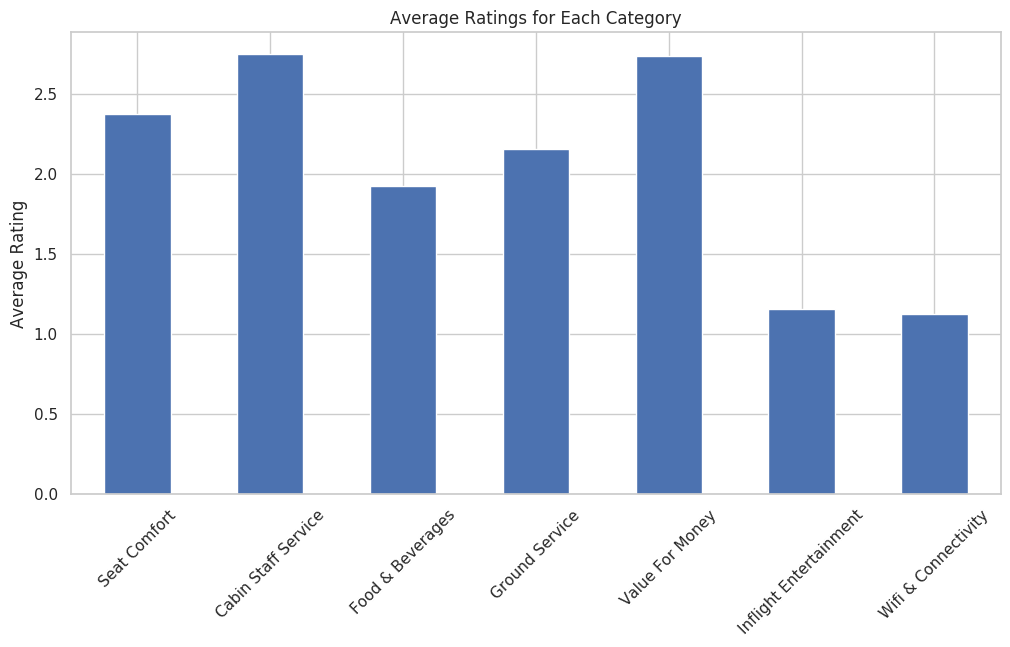

In [15]:
# average ratings for each numerical category
average_ratings = data_cleaned[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                                'Ground Service', 'Value For Money', 'Inflight Entertainment',
                                'Wifi & Connectivity']].mean()

# bar chart
plt.figure(figsize=(12, 6))
average_ratings.plot(kind='bar')
plt.title('Average Ratings for Each Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

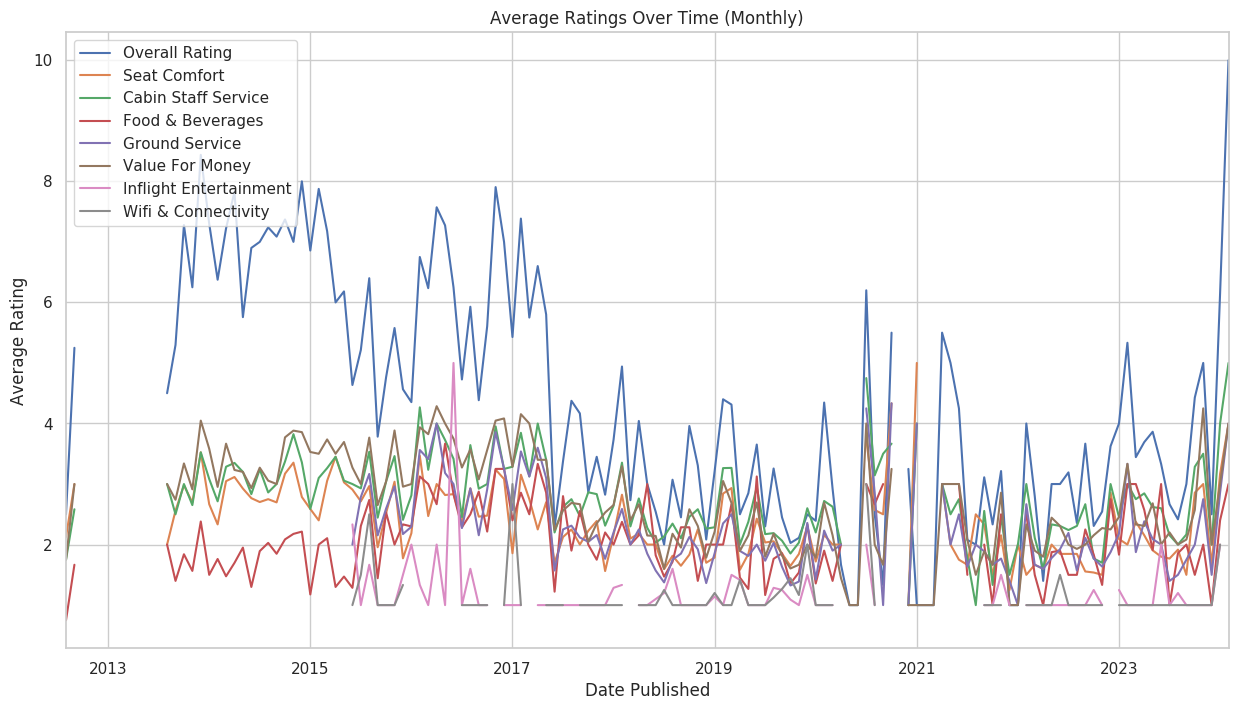

In [16]:
# Resampling the data to monthly averages
monthly_average = data_cleaned.resample('M', on='Date Published')[['Overall Rating',
                                                                   'Seat Comfort',
                                                                   'Cabin Staff Service',
                                                                   'Food & Beverages',
                                                                   'Ground Service',
                                                                   'Value For Money',
                                                                   'Inflight Entertainment',
                                                                   'Wifi & Connectivity']].mean()

# Plotting the average ratings over time
plt.figure(figsize=(15, 8))
monthly_average.plot(ax=plt.gca())
plt.title('Average Ratings Over Time (Monthly)')
plt.ylabel('Average Rating')
plt.xlabel('Date Published')
plt.legend(loc='upper left')
plt.show()

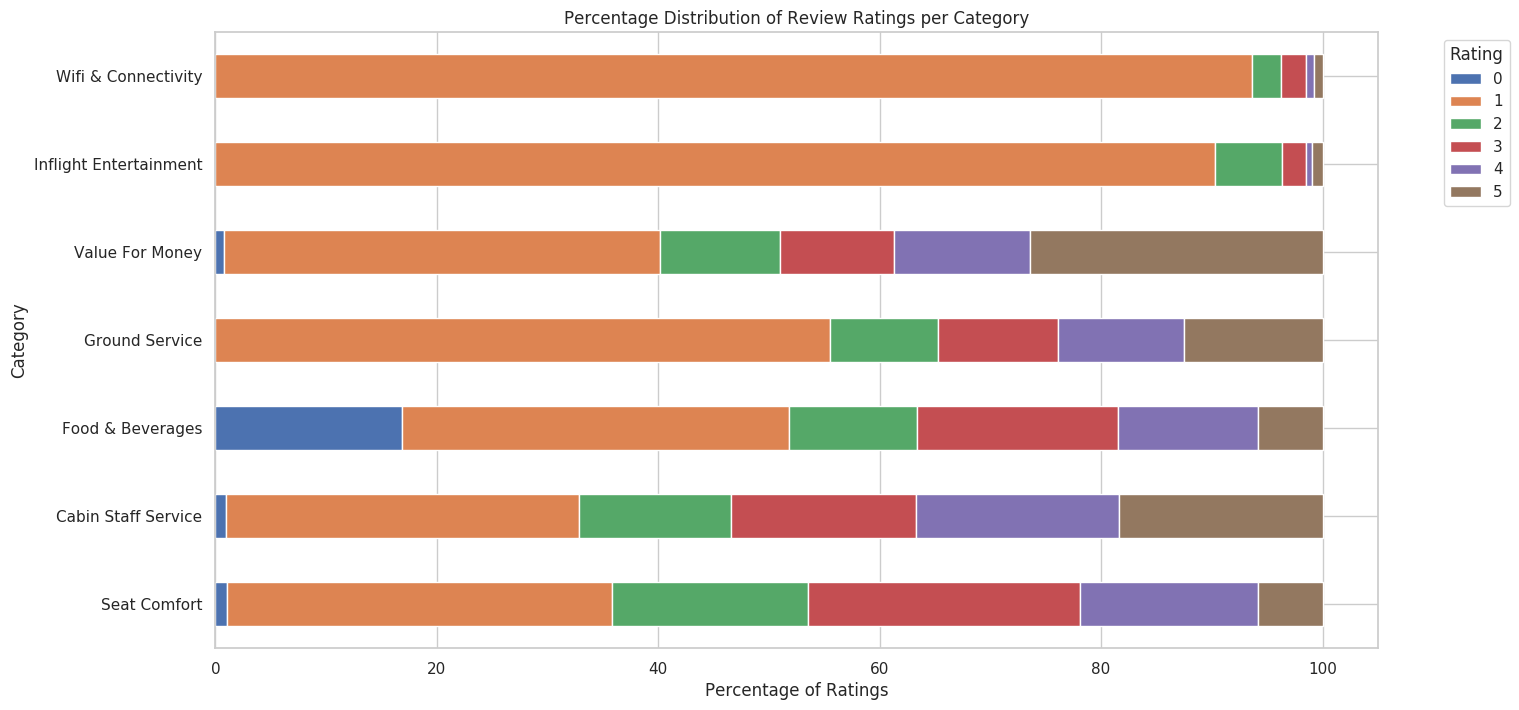

In [17]:
# note - the "0's" here are actually mostly NAs, I believe

# rating categories
rating_categories = ['Seat Comfort', 'Cabin Staff Service',
                     'Food & Beverages', 'Ground Service', 'Value For Money',
                     'Inflight Entertainment', 'Wifi & Connectivity']

# rating order
rating_order = [0, 1, 2, 3, 4, 5]

# data for the stacked bar chart
stacked_data = pd.DataFrame(index=rating_order)
for category in rating_categories:
    # Calculating percentage for each rating in the category in the specified order
    category_percentages = data_cleaned[category].value_counts(normalize=True).reindex(rating_order) * 100
    stacked_data[category] = category_percentages

# transpose the data
stacked_data = stacked_data.T.fillna(0)

# stacked horizontal bar chart
stacked_data.plot(kind='barh', stacked=True, figsize=(15, 8))
plt.title('Percentage Distribution of Review Ratings per Category')
plt.xlabel('Percentage of Ratings')
plt.ylabel('Category')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [18]:
data_cleaned['num_tokens'] = data_cleaned.Comment.apply(lambda x: len(x.split()))
data_cleaned['num_tokens']

0        84
1        27
2        51
3       198
4        35
       ... 
2244    207
2245    130
2246    126
2247    197
2248     77
Name: num_tokens, Length: 2249, dtype: int64

In [19]:
data_cleaned.num_tokens.describe(percentiles=[.80])

count    2249.000000
mean      128.939973
std        86.383149
min        15.000000
50%       106.000000
80%       183.000000
max       639.000000
Name: num_tokens, dtype: float64

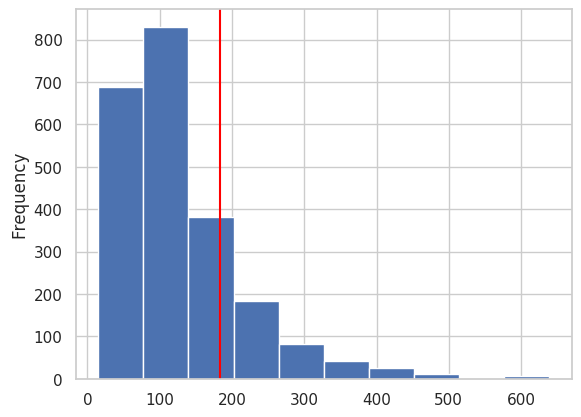

In [20]:
data_cleaned['num_tokens'].plot.hist().axvline(
    x=183, c="red"
)

In [21]:
# Questions Moving Forward:

# Do we want to impute values?

# Do we need/want to convert some to (extra) binary variables?

# Should we examine more timeline related data?